In [3]:
import models
import utils
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

In [6]:
device

'mps'

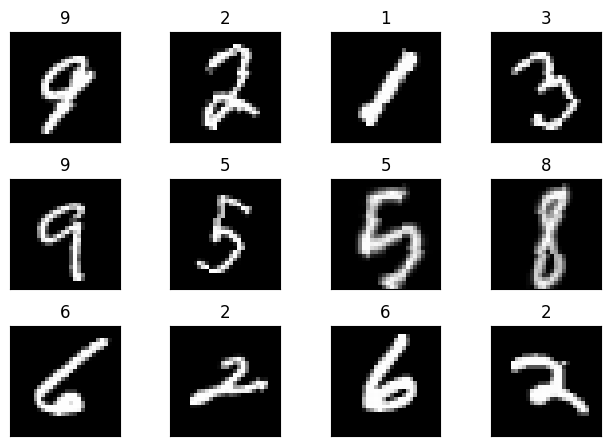

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(utils.train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:

from tqdm import tqdm
import pdb

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    #pdb.set_trace()
    pred = model(data)

    # Calculate loss
    loss = criterion(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()
    
    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
     

In [10]:
model = models.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
step_sizes = 10  # Adjust the learning rate after 10, 20, and 30 epochs
gamma = 0.1  # The factor by which the learning rate will be reduced

scheduler = optim.lr_scheduler.StepLR(optimizer, step_sizes, gamma=gamma, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, utils.train_loader, optimizer, criterion)
  test(model, device, utils.test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0863 Batch_id=117 Accuracy=94.17: 100%|██████████| 118/118 [00:13<00:00,  8.70it/s]


Test set: Average loss: 0.0001, Accuracy: 9860/10000 (98.60%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.0691 Batch_id=117 Accuracy=98.20: 100%|██████████| 118/118 [00:13<00:00,  8.98it/s]


Test set: Average loss: 0.0001, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.0268 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:13<00:00,  8.99it/s]


Test set: Average loss: 0.0001, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.0601 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:13<00:00,  8.91it/s]


Test set: Average loss: 0.0001, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.0248 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:12<00:00,  9.08it/s]


Test set: Average loss: 0.0001, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Train: Loss=0.0137 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [00:13<00:00,  8.71it/s]


Test set: Average loss: 0.0001, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7


Train: Loss=0.0237 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [00:12<00:00,  9.08it/s]


Test set: Average loss: 0.0000, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8


Train: Loss=0.0135 Batch_id=117 Accuracy=98.96: 100%|██████████| 118/118 [00:12<00:00,  9.32it/s]


Test set: Average loss: 0.0001, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9


Train: Loss=0.0364 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:11<00:00,  9.85it/s]


Test set: Average loss: 0.0000, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10


Train: Loss=0.0415 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:11<00:00,  9.87it/s]


Test set: Average loss: 0.0000, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0230 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:11<00:00,  9.83it/s]


Test set: Average loss: 0.0000, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0416 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:11<00:00,  9.90it/s]


Test set: Average loss: 0.0000, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0634 Batch_id=117 Accuracy=99.38: 100%|██████████| 118/118 [00:12<00:00,  9.59it/s]


Test set: Average loss: 0.0000, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0277 Batch_id=117 Accuracy=99.43: 100%|██████████| 118/118 [00:12<00:00,  9.67it/s]


Test set: Average loss: 0.0000, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0105 Batch_id=117 Accuracy=99.39: 100%|██████████| 118/118 [00:12<00:00,  9.61it/s]


Test set: Average loss: 0.0000, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 16


Train: Loss=0.0088 Batch_id=117 Accuracy=99.43: 100%|██████████| 118/118 [00:12<00:00,  9.58it/s]


Test set: Average loss: 0.0000, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 17


Train: Loss=0.0135 Batch_id=117 Accuracy=99.38: 100%|██████████| 118/118 [00:12<00:00,  9.58it/s]


Test set: Average loss: 0.0000, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 18


Train: Loss=0.0520 Batch_id=117 Accuracy=99.41: 100%|██████████| 118/118 [00:12<00:00,  9.57it/s]


Test set: Average loss: 0.0000, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 19


Train: Loss=0.0272 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:12<00:00,  9.35it/s]


Test set: Average loss: 0.0000, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 20


Train: Loss=0.0838 Batch_id=117 Accuracy=99.40: 100%|██████████| 118/118 [00:12<00:00,  9.52it/s]


Test set: Average loss: 0.0000, Accuracy: 9955/10000 (99.55%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

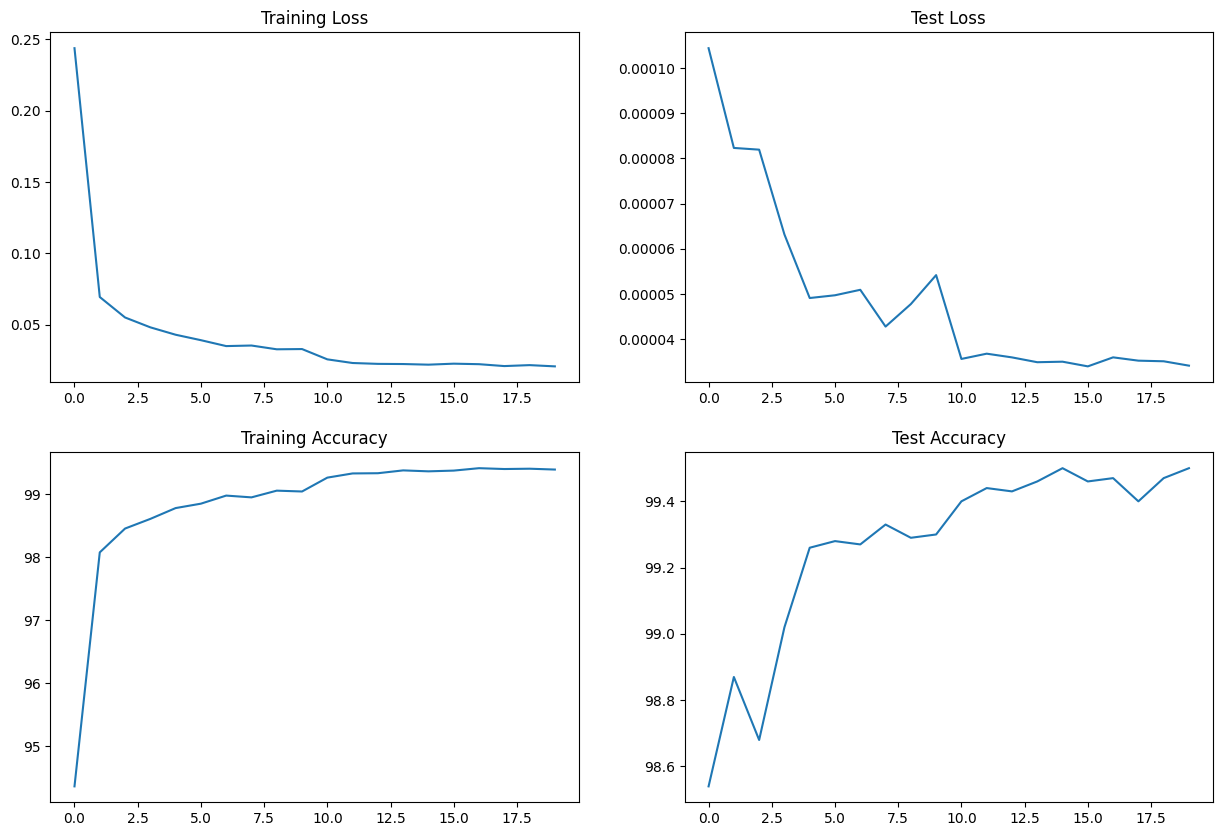

In [8]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [4]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = models.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
       BatchNorm2d-2          [-1, 128, 28, 28]             256
         MaxPool2d-3          [-1, 128, 14, 14]               0
            Conv2d-4            [-1, 8, 14, 14]           1,032
       BatchNorm2d-5            [-1, 8, 14, 14]              16
            Conv2d-6           [-1, 64, 12, 12]           4,672
       BatchNorm2d-7           [-1, 64, 12, 12]             128
         MaxPool2d-8             [-1, 64, 6, 6]               0
            Conv2d-9             [-1, 32, 6, 6]           2,080
      BatchNorm2d-10             [-1, 32, 6, 6]              64
           Conv2d-11             [-1, 16, 4, 4]           4,624
      BatchNorm2d-12             [-1, 16, 4, 4]              32
           Conv2d-13             [-1, 10, 2, 2]           1,450
      BatchNorm2d-14             [-1, 1

In [22]:
batch_data, batch_label = next(iter(utils.train_loader)) 

In [24]:
model = models.Net()

In [25]:
yhat = model(batch_data)

In [27]:
from torchviz import make_dot
make_dot(yhat, params=dict(list(model.named_parameters()))).render("MNIST_20K_Mrinal", format="png")

'MNIST_20K_Mrinal.png'

In [ ]:
_